#### **1. Import Already Filtered Data**  

In [1]:
# The dataset is kind of strange and after lot of tries I can firmly say it have a lot of outliers. 
# Studying the dataset I found three specific incredibly high and strange values and I decided to remove them by hand. 
# This is why the name of this step is called "Already Filtered".

In [2]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np

load_dotenv()
TRAIN_SET = os.getenv("FILTERED_TRAIN_PATH")
TEST_SET  = os.getenv("TEST_PATH")

train = pd.read_csv(TRAIN_SET)
test = pd.read_csv(TEST_SET)

In [3]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove records with 'sii' value NaN
x_train = train.dropna(subset=['sii'])

# Extract 'sii' (target variable) 
y_train = x_train['sii']

In [6]:
# Drop 'id' from both train and test:
x_train = x_train.drop(columns=['id'])
x_train = x_train.drop(columns=['sii'])

x_test = test.drop(columns=['id'])

In [7]:
x_train.shape, y_train.shape

((2733, 80), (2733,))

In [8]:
x_test.shape

(20, 58)

---
#### **2. Feature Cleaning**  

In [9]:
# FUNCTION DEFINITION

# given the train dataset, drop the features only present in the train dataset
def intersect_features(train, test):
    features = train[train.columns.intersection(test.columns)]
    return features

In [10]:
x_train = intersect_features(x_train, x_test)
x_train.shape, y_train.shape

((2733, 58), (2733,))

In [11]:
# FUNCTION DEFINITION

# drop all the features that have an arbitrary % threshold of missing values
def drop_columns(df, threshold):
    min_count = len(df) * threshold
    dropped_cols = df.columns[df.isnull().sum() > (len(df) - min_count)]
    df = df.drop(columns=dropped_cols)
    return df, dropped_cols

In [12]:
x_train, dropped_cols = drop_columns(x_train, 0.5)
dropped_cols

Index(['Physical-Waist_Circumference', 'Fitness_Endurance-Season',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total'],
      dtype='object')

In [13]:
x_train.shape, y_train.shape

((2733, 47), (2733,))

In [14]:
# declare the list of numerical and categorical features
numerical_features = x_train.select_dtypes(include=[np.number]).columns
categorical_features = x_train.select_dtypes(include=[object]).columns

# all numerical values converted to float
x_train[numerical_features] = x_train[numerical_features].astype(float)

print(f"Numerical features: {numerical_features}")
print(f"\n\nCategorical features: {categorical_features}")

Numerical features: Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU',
       'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL',
       'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL',
       'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC',
       'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW',
       'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat',
       'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST',
       'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw',
       'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday'],
      dtype='object')


Categorical features: Index(['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'FGC-Season', 'BIA-Season', 'PAQ_C-Season', 'SDS-Season',
     

In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2733 entries, 0 to 3955
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               2733 non-null   object 
 1   Basic_Demos-Age                         2733 non-null   float64
 2   Basic_Demos-Sex                         2733 non-null   float64
 3   CGAS-Season                             2339 non-null   object 
 4   CGAS-CGAS_Score                         2339 non-null   float64
 5   Physical-Season                         2592 non-null   object 
 6   Physical-BMI                            2524 non-null   float64
 7   Physical-Height                         2527 non-null   float64
 8   Physical-Weight                         2569 non-null   float64
 9   Physical-Diastolic_BP                   2475 non-null   float64
 10  Physical-HeartRate                      2483 non-null   float64
 

---
### **Outliers Removal!**

In [16]:
# I want to remove rows that presents extreme values (data points over the 99th percentile) 
# in at least one of the most correlated to sii features.

In [17]:
# I want to transform negative values for the feature 'BIA-BIA_Fat' to positive values
x_train['BIA-BIA_Fat'] = x_train['BIA-BIA_Fat'].abs()

In [18]:
# Let's find the most correlated features to sii
correlation = x_train[numerical_features].corrwith(y_train)
correlation = correlation.abs().sort_values(ascending=False)
correlation

Physical-Height                           0.373087
Basic_Demos-Age                           0.365613
PreInt_EduHx-computerinternet_hoursday    0.335328
Physical-Weight                           0.325306
BIA-BIA_LDM                               0.308775
BIA-BIA_BMR                               0.307756
BIA-BIA_FFM                               0.307756
BIA-BIA_LST                               0.303781
BIA-BIA_TBW                               0.301336
BIA-BIA_ECW                               0.297828
BIA-BIA_ICW                               0.292628
BIA-BIA_DEE                               0.281142
BIA-BIA_SMM                               0.261175
FGC-FGC_CU                                0.255066
SDS-SDS_Total_T                           0.232336
SDS-SDS_Total_Raw                         0.229078
BIA-BIA_BMI                               0.226200
Physical-BMI                              0.220291
BIA-BIA_Fat                               0.219183
FGC-FGC_PU                     

In [19]:
# define the list of features to be used in the outlier removal
features = correlation.index[:20]
features = features.drop('Physical-Height').drop('Basic_Demos-Age').drop('PreInt_EduHx-computerinternet_hoursday').drop('SDS-SDS_Total_T').drop('SDS-SDS_Total_Raw').drop('BIA-BIA_BMI').drop('Physical-BMI').drop('FGC-FGC_PU')
print(f"Features to be used in the outlier removal are {features.size}:\n {features}")

Features to be used in the outlier removal are 12:
 Index(['Physical-Weight', 'BIA-BIA_LDM', 'BIA-BIA_BMR', 'BIA-BIA_FFM',
       'BIA-BIA_LST', 'BIA-BIA_TBW', 'BIA-BIA_ECW', 'BIA-BIA_ICW',
       'BIA-BIA_DEE', 'BIA-BIA_SMM', 'FGC-FGC_CU', 'BIA-BIA_Fat'],
      dtype='object')


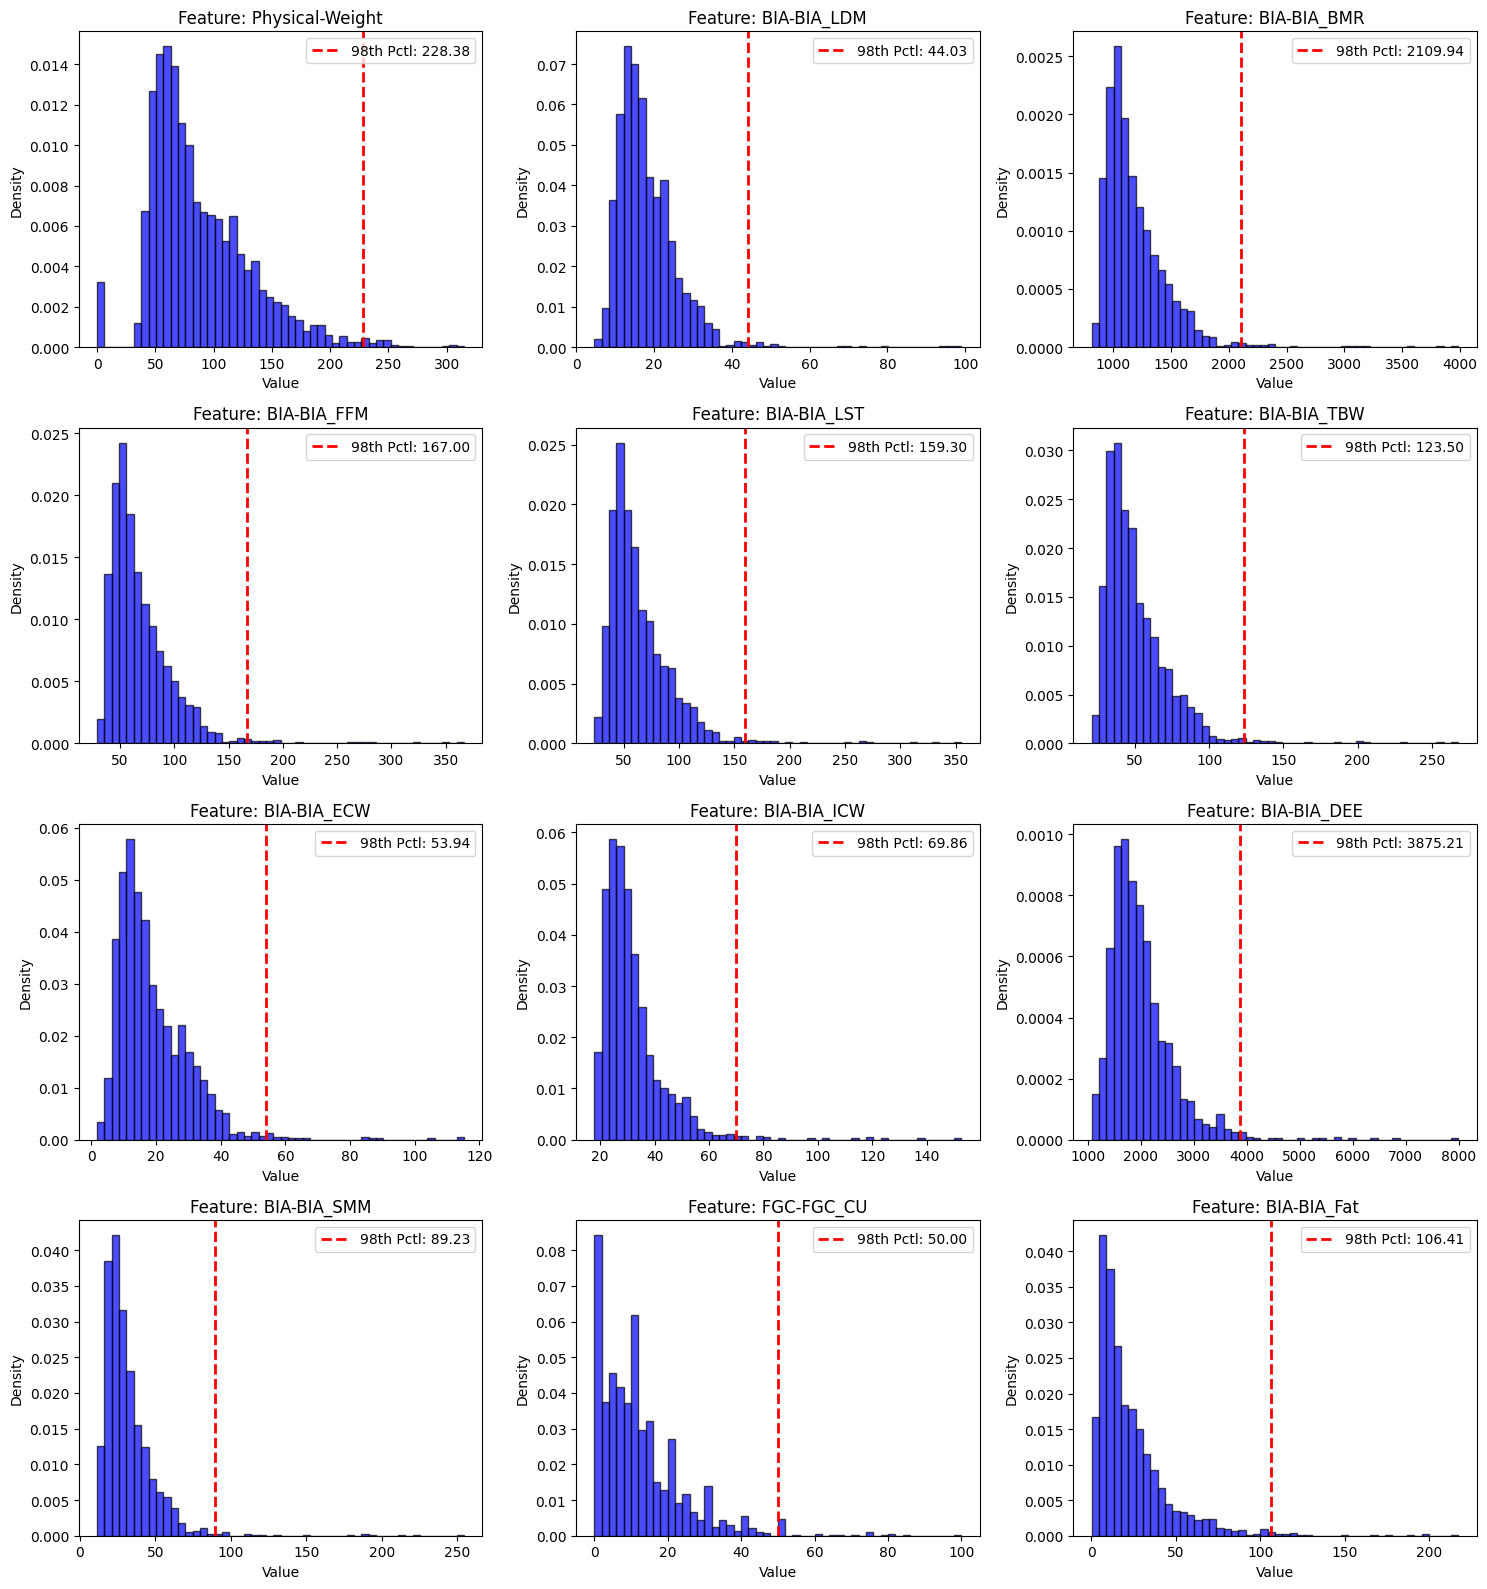

In [20]:
import matplotlib.pyplot as plt

# Define the features being used for outlier removal
selected_features = features  # Assuming `features` is already defined

# Create subplots
num_features = len(selected_features)
n_cols = 3  # Number of columns in the plot
n_rows = (num_features // n_cols) + (num_features % n_cols > 0)  # Dynamic row count

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten the axis array for easy iteration

for i, feature in enumerate(selected_features):
    ax = axes[i]
    data = x_train[feature].dropna()
    q99 = np.percentile(data, 99)  # Compute the 99th percentile

    ax.hist(data, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
    ax.axvline(q99, color='red', linestyle='dashed', linewidth=2, label=f'98th Pctl: {q99:.2f}')
    
    ax.set_title(f"Feature: {feature}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
# remove the rows with extreme values in at least one of the most correlated features
x_train = x_train[(np.abs(x_train[features]) < np.abs(x_train[features]).quantile(0.99)).all(axis=1)]
                    # here I check if each row has values below the 99th percentile for all the features in the list
                    # if a row has at least one value above the 99th percentile, it is removed
y_train = y_train[x_train.index]

x_train.shape, y_train.shape

((1491, 47), (1491,))

---

In [22]:
# Let's Try with some Feature Engineering

---
### **Feature Engineering**

In [23]:
# Now I want to fill the missing values with imputation through bayesan ridge model:

from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0, verbose=2)



imp.fit(x_train[numerical_features.drop('Basic_Demos-Age').drop('Basic_Demos-Sex')])
x_train[numerical_features.drop('Basic_Demos-Age').drop('Basic_Demos-Sex')] = imp.transform(x_train[numerical_features.drop('Basic_Demos-Age').drop('Basic_Demos-Sex')]).round()
# truncate the imputed value (x) such that .0 < x < .5 is rounded down to .0 and .5 < x < 1.0 is rounded up to 1.0

[IterativeImputer] Completing matrix with shape (1491, 37)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.47
[IterativeImputer] Change: 25.024356290525546, scaled tolerance: 3.86887 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.80
[IterativeImputer] Change: 7.4392006040300105, scaled tolerance: 3.86887 
[IterativeImputer] Ending imputation round 3/10, elapsed time 1.21
[IterativeImputer] Change: 3.8886486449707824, scaled tolerance: 3.86887 
[IterativeImputer] Ending imputation round 4/10, elapsed time 1.69
[IterativeImputer] Change: 1.7350144681287678, scaled tolerance: 3.86887 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (1491, 37)
[IterativeImputer] Ending imputation round 1/4, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/4, elapsed time 0.01
[IterativeImputer] Ending imputation round 3/4, elapsed time 0.01
[IterativeImputer] Ending imputation round 4/4, elapsed time 0.02


Imputation Converges before the 5th iteration. Might be a good result(?)

In [24]:
# I want to fill the missing values in the categorical features with the most frequent value
x_train[categorical_features] = x_train[categorical_features].fillna(x_train[categorical_features].mode().iloc[0])

In [25]:
# split the features into numerical and categorical
x_train_cat = x_train[categorical_features]
x_train_num = x_train[numerical_features]

# one-hot encode the categorical features
x_train_cat = pd.get_dummies(x_train_cat)
x_train_cat *= 1

In [26]:
# concatenate the numerical and categorical features
x_train = pd.concat([x_train_num, x_train_cat], axis=1)
x_train = x_train.astype(float)

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1491 entries, 0 to 3954
Data columns (total 71 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         1491 non-null   float64
 1   Basic_Demos-Sex                         1491 non-null   float64
 2   CGAS-CGAS_Score                         1491 non-null   float64
 3   Physical-BMI                            1491 non-null   float64
 4   Physical-Height                         1491 non-null   float64
 5   Physical-Weight                         1491 non-null   float64
 6   Physical-Diastolic_BP                   1491 non-null   float64
 7   Physical-HeartRate                      1491 non-null   float64
 8   Physical-Systolic_BP                    1491 non-null   float64
 9   FGC-FGC_CU                              1491 non-null   float64
 10  FGC-FGC_CU_Zone                         1491 non-null   float64
 

In [28]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1491 entries, 0 to 3954
Series name: sii
Non-Null Count  Dtype  
--------------  -----  
1491 non-null   float64
dtypes: float64(1)
memory usage: 23.3 KB


In [29]:
x_train.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,5.0,0.0,51.0,17.0,46.0,51.0,67.0,85.0,110.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,9.0,0.0,62.0,14.0,48.0,46.0,75.0,70.0,122.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.0,0.0,71.0,18.0,56.0,82.0,60.0,97.0,117.0,18.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,13.0,1.0,50.0,22.0,60.0,112.0,60.0,73.0,102.0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,10.0,0.0,65.0,20.0,55.0,85.0,123.0,83.0,163.0,9.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [30]:
# Now I want to merge the FGC-Attr and the FGC-Attr_Zone features


# FUNCTION DEFINITION
def merge_fgc(train):
    FGC_features = [col for col in train.columns if 'FGC' in col]
    if 'FGC-Season' in FGC_features: 
        FGC_features.remove('FGC-Season')
    removed_features = 0
    zone_features_to_drop = []

    for feature in FGC_features:
        zone_feature = feature + '_Zone'

        if zone_feature in train.columns:
            print(f'Feature: {feature} - Zone: {zone_feature}')
            train[feature] = train[feature] + (train[zone_feature] * train[feature] * 0.25)
            zone_features_to_drop.append(zone_feature)
            removed_features += 1
    train = train.drop(zone_features_to_drop, axis=1)
    return train, removed_features

In [31]:
x_train, removed_features = merge_fgc(x_train)
print(f'\nRemoved features: {removed_features}')

Feature: FGC-FGC_CU - Zone: FGC-FGC_CU_Zone
Feature: FGC-FGC_PU - Zone: FGC-FGC_PU_Zone
Feature: FGC-FGC_SRL - Zone: FGC-FGC_SRL_Zone
Feature: FGC-FGC_SRR - Zone: FGC-FGC_SRR_Zone
Feature: FGC-FGC_TL - Zone: FGC-FGC_TL_Zone

Removed features: 5


In [32]:
x_train.shape, y_train.shape

((1491, 66), (1491,))

In [33]:
x_train.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,5.0,0.0,51.0,17.0,46.0,51.0,67.0,85.0,110.0,0.00,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,9.0,0.0,62.0,14.0,48.0,46.0,75.0,70.0,122.0,3.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.0,0.0,71.0,18.0,56.0,82.0,60.0,97.0,117.0,22.50,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,13.0,1.0,50.0,22.0,60.0,112.0,60.0,73.0,102.0,12.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,10.0,0.0,65.0,20.0,55.0,85.0,123.0,83.0,163.0,11.25,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [34]:
# Now I want to select the most informative features using a Random Forest and Recursive Feature Elimination

# train a Random Forest to subselect the most informative features and drop the rest
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=41)
selector = RFECV(rf, step=1, cv=4,
                 scoring='accuracy',        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                 min_features_to_select=2)

selector.fit(x_train, y_train);
print (f"Number of selected features: {selector.n_features_}")

Number of selected features: 20


In [35]:
X_features = x_train[x_train.columns[selector.support_]]
X_features.head()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,FGC-FGC_SRR,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_FFM,BIA-BIA_Fat,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,5.0,51.0,46.0,51.0,67.0,85.0,110.0,0.00,0.0,6.00,932.0,1492.0,42.0,9.0,9.0,39.0,20.0,41.0,58.0,3.0
1,9.0,62.0,48.0,46.0,75.0,70.0,122.0,3.00,5.0,13.75,937.0,1499.0,42.0,4.0,15.0,39.0,15.0,46.0,64.0,0.0
3,9.0,71.0,56.0,82.0,60.0,97.0,117.0,22.50,5.0,7.00,1131.0,1923.0,63.0,19.0,17.0,59.0,26.0,31.0,45.0,0.0
5,13.0,50.0,60.0,112.0,60.0,73.0,102.0,12.00,6.0,13.75,1331.0,1996.0,84.0,68.0,21.0,80.0,35.0,40.0,56.0,0.0
6,10.0,65.0,55.0,85.0,123.0,83.0,163.0,11.25,2.0,13.75,1136.0,1817.0,63.0,21.0,16.0,59.0,26.0,27.0,40.0,3.0


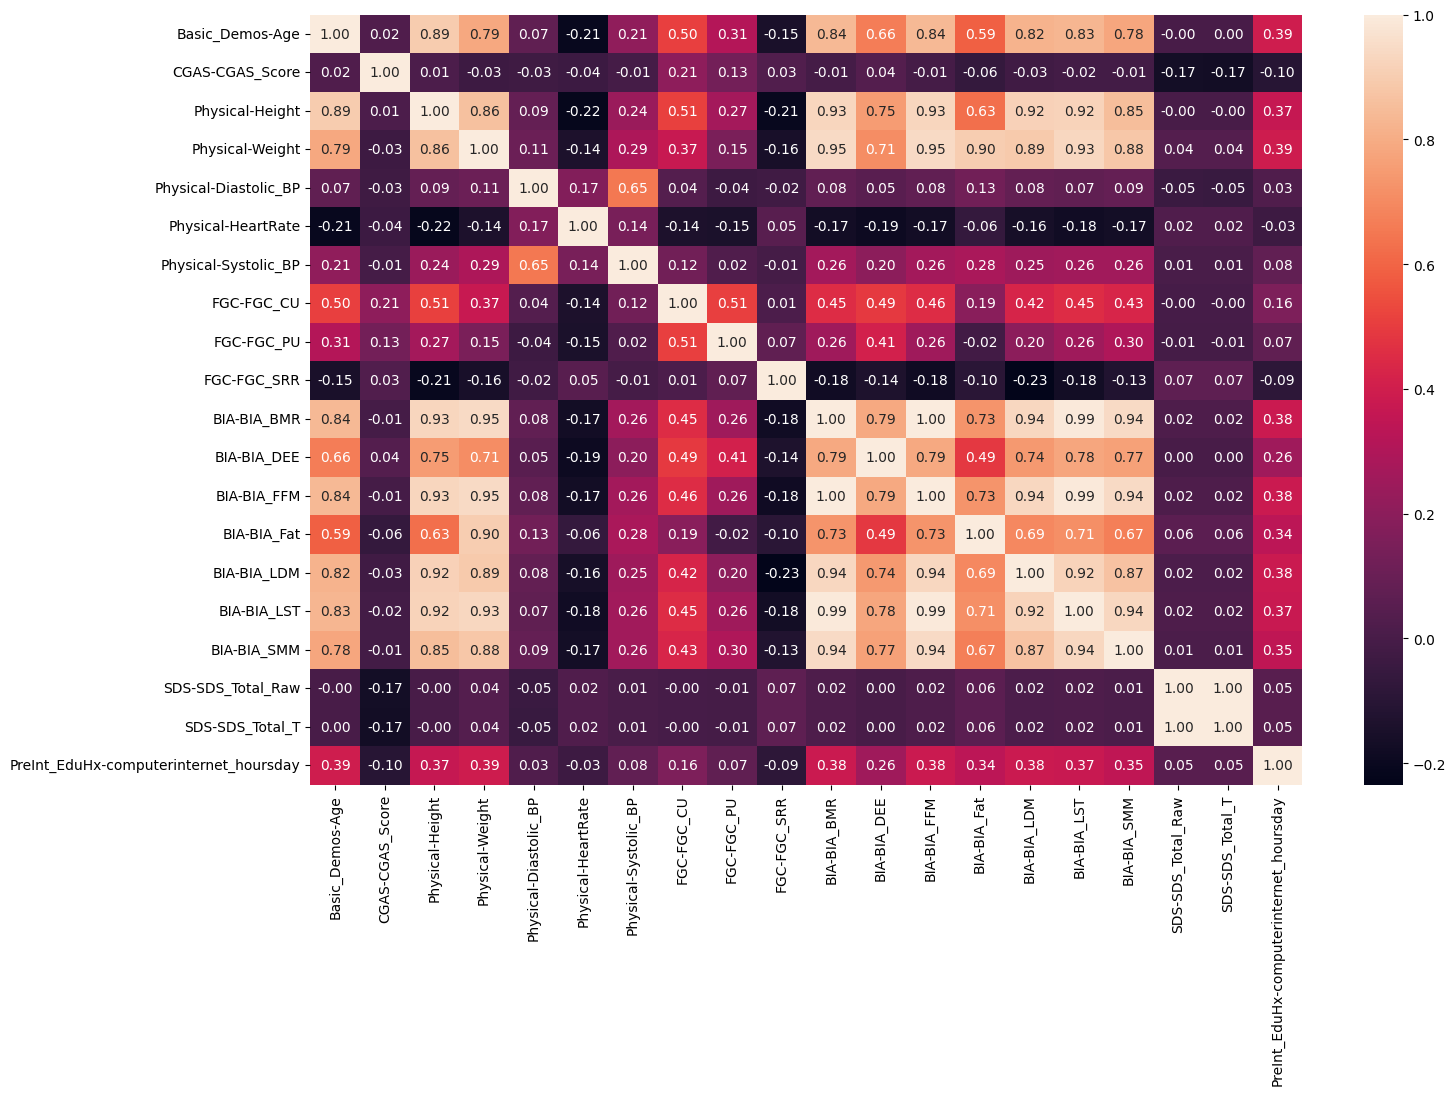

In [36]:
# Now I want to see the heatmap of the correlation matrixt of the last features remaining

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(X_features.corr(), annot=True, fmt=".2f")
plt.show()

In [37]:
# Drop the features that have a correlation higher than 0.9
corr_matrix = X_features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_features = X_features.drop(columns=to_drop)
X_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1491 entries, 0 to 3954
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         1491 non-null   float64
 1   CGAS-CGAS_Score                         1491 non-null   float64
 2   Physical-Height                         1491 non-null   float64
 3   Physical-Weight                         1491 non-null   float64
 4   Physical-Diastolic_BP                   1491 non-null   float64
 5   Physical-HeartRate                      1491 non-null   float64
 6   Physical-Systolic_BP                    1491 non-null   float64
 7   FGC-FGC_CU                              1491 non-null   float64
 8   FGC-FGC_PU                              1491 non-null   float64
 9   FGC-FGC_SRR                             1491 non-null   float64
 10  BIA-BIA_DEE                             1491 non-null   float64
 

In [38]:
X_features.head()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,FGC-FGC_SRR,BIA-BIA_DEE,SDS-SDS_Total_Raw,PreInt_EduHx-computerinternet_hoursday
0,5.0,51.0,46.0,51.0,67.0,85.0,110.0,0.00,0.0,6.00,1492.0,41.0,3.0
1,9.0,62.0,48.0,46.0,75.0,70.0,122.0,3.00,5.0,13.75,1499.0,46.0,0.0
3,9.0,71.0,56.0,82.0,60.0,97.0,117.0,22.50,5.0,7.00,1923.0,31.0,0.0
5,13.0,50.0,60.0,112.0,60.0,73.0,102.0,12.00,6.0,13.75,1996.0,40.0,0.0
6,10.0,65.0,55.0,85.0,123.0,83.0,163.0,11.25,2.0,13.75,1817.0,27.0,3.0


In [39]:
# And this is the cleaned dataset. I want to export it:
X_features = pd.concat([X_features, y_train], axis=1)
X_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1491 entries, 0 to 3954
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         1491 non-null   float64
 1   CGAS-CGAS_Score                         1491 non-null   float64
 2   Physical-Height                         1491 non-null   float64
 3   Physical-Weight                         1491 non-null   float64
 4   Physical-Diastolic_BP                   1491 non-null   float64
 5   Physical-HeartRate                      1491 non-null   float64
 6   Physical-Systolic_BP                    1491 non-null   float64
 7   FGC-FGC_CU                              1491 non-null   float64
 8   FGC-FGC_PU                              1491 non-null   float64
 9   FGC-FGC_SRR                             1491 non-null   float64
 10  BIA-BIA_DEE                             1491 non-null   float64
 

In [40]:
# export dataset

output_path = os.path.join('dataset/', 'cleaned_train.csv')
X_features.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to {output_path}")

Cleaned dataset saved to dataset/cleaned_train.csv
